In [100]:
import pandas as pd
import plotly.express as px

url = 'https://raw.githubusercontent.com/nazareno/enade-vis/master/data/ies_Brasil.csv'
dados_enade = pd.read_csv(url, sep =";")
df = pd.DataFrame(dados_enade)

df

,Código Mantenedora,Razão Social,CNPJ,Natureza Jurídica,Código IES,Instituição(IES),Sigla,Endereço,Município,UF,...,Tipo de Credenciamento,Categoria,Categoria Administrativa,CI,Ano CI,CI-EaD,Ano CI-EaD,IGC,Ano IGC,Situação
0,323,ASSOCIACAO BRASILEIRA DE ENSINO UNIVERSITARIO ...,30.831.606/0001-30,Privada sem fins lucrativos,2565,ABEU - CENTRO UNIVERSITÁRIO (UNIABEU),UNIABEU,Rua Itaiara - 301 - s/c - CEP: 26113-400 - Centro,Belford Roxo,RJ,...,Presencial - Superior,Privada,Privada sem fins lucrativos,4,2015.0,-,NaN,3,2016.0,Ativa
1,16500,COMANDO DO EXERCITO,00.394.452/0270-52,Pessoa Jurídica de Direito Público - Federal,21095,Academia Militar das Agulhas Negras (AMAN),AMAN,AC Academia Militar de Agulhas Negras - 306 - ...,Resende,RJ,...,Presencial - Superior,Pública,Pública Federal,-,NaN,-,NaN,-,NaN,Ativa
2,2371,INSTITUTO EDUCACIONAL ALMENARA LTDA - EPP,05.598.350/0001-15,Privada com fins lucrativos,3756,ALFA - Faculdade de Almenara,-,Rua Vereador Virgílio Mendes Lima - 847 - s/c ...,Almenara,MG,...,EAD - Superior / Presencial - Superior,Privada,Privada com fins lucrativos,3,2013.0,3,2015.0,2,2016.0,Ativa
3,2371,INSTITUTO EDUCACIONAL ALMENARA LTDA - EPP,05.598.350/0001-15,Privada com fins lucrativos,18520,ALFA - Faculdade de Araçuai (ALFA-Araçuai),ALFA-Araçuai,Rua Dom Serafim - 435 - s/c - CEP: 39600-000 -...,Araçuaí,MG,...,Presencial - Superior,Privada,Privada com fins lucrativos,3,2015.0,-,NaN,-,NaN,Ativa
4,2371,INSTITUTO EDUCACIONAL ALMENARA LTDA - EPP,05.598.350/0001-15,Privada com fins lucrativos,18692,ALFA - Faculdade de Guanhães (ALFA - Gunhães),ALFA - Gunhães,Rua Wantuil Caldeira - 544 - s/c - CEP: 39740-...,Guanhães,MG,...,Presencial - Superior,Privada,Privada com fins lucrativos,3,2015.0,-,NaN,-,NaN,Ativa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,16298,SOCIEDADE PAULISTA DE ENSINO E PESQUISA S/S LTDA,04.302.037/0001-25,Pessoa Jurídica de Direito Privado - Com fins ...,481,Universidade Universus Veritas Guarulhos (Univ...,Univeritas UNG,Praça Tereza Cristina - 88 - s/c - CEP: 07023-...,Guarulhos,SP,...,EAD - Superior / Presencial - Superior,Privada,Privada sem fins lucrativos,4,2010.0,5,2014.0,3,2016.0,Ativa
2946,354,FUNDACAO PERCIVAL FARQUHAR,20.611.810/0001-91,Pessoa Jurídica de Direito Privado - Sem fins ...,513,UNIVERSIDADE VALE DO RIO DOCE (UNIVALE),UNIVALE,Rua Israel Pinheiro - 2000 - Campus Antônio Ro...,Governador Valadares,MG,...,EAD - Superior / Presencial - Superior,Privada,Privada sem fins lucrativos,3,2009.0,-,NaN,3,2016.0,Ativa
2947,27,FUNDACAO COMUNITARIA TRICORDIANA DE EDUCACAO,25.872.854/0001-99,Privada sem fins lucrativos,27,UNIVERSIDADE VALE DO RIO VERDE (UNINCOR),UNINCOR,Av. Castelo Branco - 82 - s/c - CEP: 37410-000...,Três Corações,MG,...,EAD - Superior / Presencial - Superior,Privada,Privada sem fins lucrativos,4,2017.0,3,2013.0,3,2016.0,Ativa
2948,436,SOC EDUC DO ESP SANTO UNIDADE DE V VELHA ENSIN...,27.067.651/0001-55,Privada sem fins lucrativos,664,UNIVERSIDADE VILA VELHA (UVV),UVV,Av. Comissário José Dantas de Mello - 21 - s/c...,Vila Velha,ES,...,EAD - Superior / Presencial - Superior,Privada,Privada sem fins lucrativos,5,2017.0,5,2015.0,4,2016.0,Ativa


In [101]:
# 10 estados que mais tem faculdade
# ideias: qual curso é mais ofertado? presencial ou ead
# quais categorias tem mais faculdade ex: publica, sem fins lucrativos
# qtd faculdades ativas no br
# qtd nao ativa no br

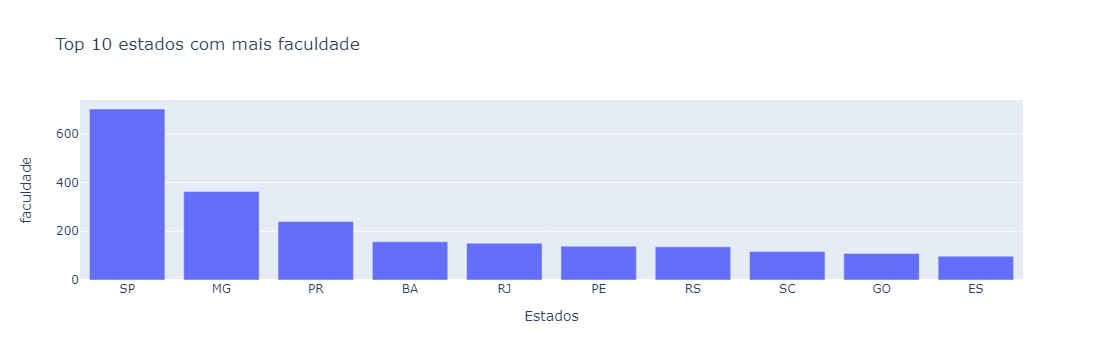

In [102]:

df_facul_maiores_estados = df.groupby('UF').size().reset_index(name='contagem')
df_facul_maiores_estados = df_facul_maiores_estados.sort_values(by='contagem', ascending=False)
df_facul_maiores_estados = df_facul_maiores_estados.head(10)
df_facul_maiores_estados

fig = px.bar(
    x=df_facul_maiores_estados["UF"],
    y=df_facul_maiores_estados["contagem"],
    title="Top 10 estados com mais faculdade"
)


fig.update_layout(xaxis_title="Estados", yaxis_title="faculdade") 


fig

In [110]:

df_facul_maiores = df.groupby('Instituição(IES)').size().reset_index(name='quantidade')
df_facul_maiores = df_facul_maiores.sort_values(by='quantidade', ascending=False)
df_facul_maiores = df_facul_maiores.head(10)
df_facul_maiores.sort_values(by='quantidade', ascending=False)
df_facul_maiores

,Instituição(IES),quantidade
1516,FACULDADE LA SALLE,2
433,FACULDADE BRASILEIRA DE TECNOLOGIA (FBT),2
1766,FACULDADE SANTA RITA (FASAR),2
713,FACULDADE DE CIÊNCIAS SOCIAIS APLICADAS,2
0,ABEU - CENTRO UNIVERSITÁRIO (UNIABEU),1
1967,FACULDADES EVANGÉLICAS INTEGRADAS CANTARES DE ...,1
1960,FACULDADES ASSOCIADAS DE UBERABA - FAZU (FAZU),1
1961,FACULDADES BATISTA DO PARANÁ (FABAPAR),1
1962,FACULDADES COC DE SÃO PAULO (FACOCSP),1
1963,FACULDADES DA FUNDAÇÃO DE ENSINO DE MOCOCA (FA...,1


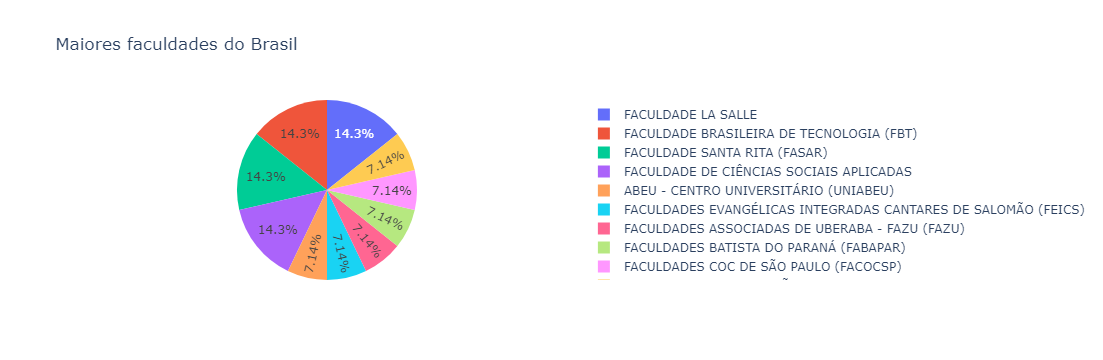

In [112]:
df_facul_maiores

fig2 = px.pie(
    df_facul_maiores, 
    values='quantidade', 
    names='Instituição(IES)', 
    title='Maiores faculdades do Brasil'
)

fig2

In [108]:
df_instituicoes = df[["Razão Social", "Categoria", "Ano IGC"]]

df_instituicoes = df_instituicoes.sort_values(by="Razão Social")
df_instituicoes = df_instituicoes.groupby("Categoria")["Razão Social"].nunique().reset_index(name="quant")

df_instituicoes


,Categoria,quant
0,Privada,1748
1,Pública,209


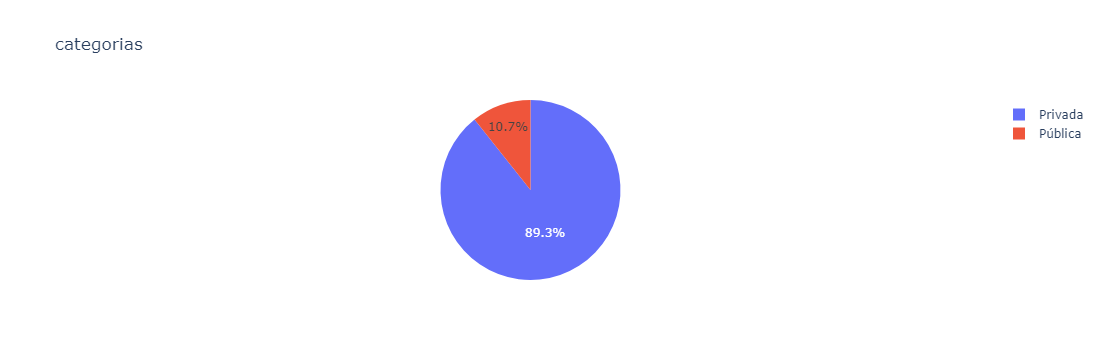

In [121]:
df_instituicoes


grafico_categoria = px.pie(
   df_instituicoes, 
    values='quant', 
    names='Categoria', 
    title='categorias'
)

grafico_categoria
